# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: How does PCA accomplish dimensionality reduction? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- Transform our data by projecting onto orthogonal axis
- Eigen decomposition to break down into eigenvectors / eigenvalues
- use vector to transform features into principal components
- 1st component captures the most amount of variance in our features


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- Reduce computational complexity (model complexity) b/c less features (also reduces overfitting)
- Eliminates any collinearity between features
- Can help to visualize our data by reducing to 2 or 3 dimensions


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- Put every feature on the same scale or range, therefore not given undoe weight to certain features
- PCA is a linear process, distance based


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- If visualization, 2 or 3 components
- However much we want our components to explain the variance in our feature data


## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- scale data


In [ ]:
# call_on_students(1)

In [3]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scld = ss.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [13]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(X_scld)

### 7: How Much Variance is Explained by the First 2 Components?

In [11]:
# call_on_students(1)

In [15]:
# Code here to answer the question
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

#### Answer:

- 63% of the variance is explained by the first two components


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- pass it number of clusters, will create random centroids at this number
- assign datapoints to their closest centroid
- take all obvs assigned to each cluster (centroid), calculate the actual centroid of all those data points
- move our centroid points based on the calculation
- remeasure and reassign datapoints to their new closest centroid
- repeat step 3 until we hit our stopping criterion or centroids don't move


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Sum of squared distances from point to center of its cluster (error)
- Elbow plot with varying k clusters
- k value where the largest drop in error occurs, inflection point


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette Score
- For inertia low value better (error)
- For Silhouette score we want to be closest to 1 (-1 to 1)
- Sil: looking at inter and intra cluster distance
- Inertia: looking at only intra cluster distance


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [35]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- 


In [36]:
# call_on_students(1)

In [37]:
# Code to preprocess the data
# Name the processed data X_processed
ss = StandardScaler()

X_processed = ss.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [38]:
# call_on_students(1)

In [39]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [40]:
# Fit the object
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(X_processed)

AgglomerativeClustering()

In [41]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score

preds = cluster.labels_

silhouette_score(X_processed, preds)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [42]:
# call_on_students(1)

In [43]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Instantiate
    model = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    model.fit(data)
    # Print the silhouette score
    labels = model.labels_
    print(silhouette_score(data, labels))
    # Return the labels attribute from the fit clustering model
    return model.labels_

In [44]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.31696983029912795
0.31094652900725794


# 3) Time Series

In [66]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- 


In [67]:
# call_on_students(1)

In [71]:
# Code here 
ap = ap.set_index(pd.to_datetime(ap['Month'])).drop(columns='Month')
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Trend: long term movement (can be linear or otherwise)
- Seasonal: fluctuation in data that follows regular pattern
- Cyclical: when data exhibits rises/falls not at a fixed period
- Irregular: caused by unpredictable influences
- variance changes with time

Second, plot this time series data. What kinds of patterns do you see in this dataset?

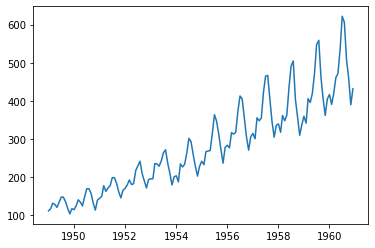

In [73]:
# Code to plot the time series
fig, ax = plt.subplots()

ax.plot(ap);

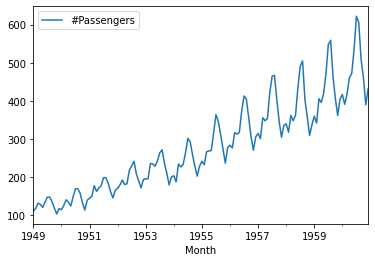

In [75]:
ap.plot();

### 16: Explore the Moving Average

What window would make sense to use for this data?

- pattern every year, our window would be 12


In [ ]:
# call_on_students(1)

In [76]:
# Code to create the moving average
moving_avg = ap.rolling(window=12).mean()

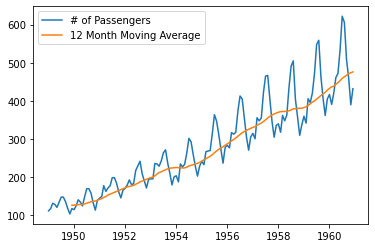

In [80]:
# Add to the moving average to the above plot
fig, ax = plt.subplots()

ax.plot(ap, label='# of Passengers');
ax.plot(moving_avg, label='12 Month Moving Average');
ax.legend();

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- easier to work with stationary data b/c mean and std is constant
- eliminate any temporal dependence of our data and model the noise that we can potentially predict on 
- models with stationary data perform better


What can we do to make our data stationary?

- straight mathmatical transformation (ie log or sqrt)
- subtract rolling average
- difference our data (subtract previous value from current value; order of 1 difference)


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [81]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [82]:
adfuller(ap)

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [84]:
# Code here to try to make the data stationary
ap_diff = ap.diff().dropna()

In [85]:
# Code here to check if the data is stationary
adfuller(ap_diff)

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [90]:
apoutput = pd.Series(
    adfuller(ap_diff)[0:4],
    index=['Test Statistic', 'p-value', '#Lags Used',
           'Number of Observations Used'])
for key,value in adfuller(ap_diff)[4].items():
    apoutput['Critical Value (%s)'%key] = value
print(apoutput)

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


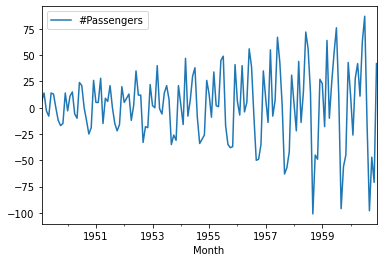

In [92]:
ap_diff.plot();

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [93]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. Remove punct and whitespace 
2. Remove stopwords (very common words with no semantic value)
3. Stem or Lem to remove prefixes/suffixes/grammar (we want the root word)
4. Lowercase everything
5. Tokenize

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- columns: each word (token) in the corpus is a column
- rows(3): each row represents each sentence


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- normalize terms, representing how important that term is to the document in comparison to the rest of the corpus
- TF = term frequency
- IDF = inverse document frequency


## NLP in Code

### Set Up

In [94]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [95]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [96]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies.policy, policies.candidate)

In [97]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
# Instantiate it
vectorizer = CountVectorizer()

In [101]:
# Fit it
vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [106]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [105]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [107]:
# Code here to evaluate your model on the test set
rf.score(X_test_vec, y_test)

0.8958333333333334